## 创建时间对象
在 Pandas 中关于时间序列的常见对象有 6 种，分别是 Timestamp（时间戳）、DatetimeIndex（时间戳索引）、Period（时间段）、PeriodIndex（时间段索引）、以时间为元素的 Series 和以及以时间索引的 DataFrame。

### 创建时间戳
创建时间为 2018 年 10 月 1 日的时间戳。

In [3]:
import pandas as pd

pd.Timestamp(2018, 10, 1)



Timestamp('2018-10-01 00:00:00')

In [5]:
#也可以使创建的时间精确到时分秒。
pd.Timestamp("2018-10-1 10:00:1")


Timestamp('2018-10-01 10:00:01')

In [7]:
from datetime import datetime

pd.Timestamp(datetime(2018, 10, 1))

Timestamp('2018-10-01 00:00:00')

### 创建时间段
 Period 时间段表示时间轴上的某一区间，

In [10]:
pd.Period('2018-10')

Period('2018-10', 'M')

Period() 函数后面通常有两个参数，第二个 freq 参数决定时间段的分割长度。

创建频率为日的时间段。

In [12]:
pd.Period('2018-10', freq='D')

Period('2018-10-01', 'D')

###  创建时间元素的 Series

Pandas 中常用 to_datetime() 函数可以创建以时间为元素的 Series。

创建一个 Series，以三个时间的字符串作为元素。

In [14]:
df = ['2018-08-01', '2018-09-01', '2018-10-01']
pd.to_datetime(df)

DatetimeIndex(['2018-08-01', '2018-09-01', '2018-10-01'], dtype='datetime64[ns]', freq=None)

创建时间元素的 Series。

In [16]:
df = pd.Series(['Sep 30, 2018', '2018-10-1', None])
pd.to_datetime(df)

0   2018-09-30
1   2018-10-01
2          NaT
dtype: datetime64[ns]

In [18]:
df = pd.DataFrame({'year': [2017, 2018],
                   'month': [9, 10],
                   'day': [30, 1],
                   'hour': [23, 0]})
pd.to_datetime(df)

0   2017-09-30 23:00:00
1   2018-10-01 00:00:00
dtype: datetime64[ns]

### 创建时间索引

要生成带有时间戳的索引，可以使用 DatetimeIndex() 构造函数，并传入列表或 Series 对象：

In [20]:
dates = ['2018-08-01', '2018-09-01', '2018-10-01']
index = pd.DatetimeIndex(dates)
index

DatetimeIndex(['2018-08-01', '2018-09-01', '2018-10-01'], dtype='datetime64[ns]', freq=None)

使用 date_range() 和 bdate_range() 来批量创建相同时间间隔的时间戳索引。

In [22]:
#创建以 2018 年 9 月 30 日为开始的 250 条时间索引，相邻索引间隔时间长度为一个月。

index = pd.date_range('2018-9-30', periods=250, freq='M')
index

DatetimeIndex(['2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30',
               ...
               '2038-09-30', '2038-10-31', '2038-11-30', '2038-12-31',
               '2039-01-31', '2039-02-28', '2039-03-31', '2039-04-30',
               '2039-05-31', '2039-06-30'],
              dtype='datetime64[ns]', length=250, freq='M')

In [24]:
#创建以 2018 年 10 月 1 日为开始的 111 条时间索引，相邻索引间隔时间长度为一个工作日。
index = pd.bdate_range('2018-10-1', periods=111)
index

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12',
               ...
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
               '2019-03-01', '2019-03-04'],
              dtype='datetime64[ns]', length=111, freq='B')

在 date_range() 和 bdate_range() 中可以巧妙使用 start，end， periods，freq 等参数的各种组合轻松批量创建时间索引。

In [27]:
#在 2017 年 10 月 1 日到 2018 年 10 月 1 日间，每隔一周创建一条索引。

start = datetime(2017, 10, 1)
end = datetime(2018, 10, 1)
rng = pd.date_range(start, end, freq='W')
rng
 

DatetimeIndex(['2017-10-01', '2017-10-08', '2017-10-15', '2017-10-22',
               '2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19',
               '2017-11-26', '2017-12-03', '2017-12-10', '2017-12-17',
               '2017-12-24', '2017-12-31', '2018-01-07', '2018-01-14',
               '2018-01-21', '2018-01-28', '2018-02-04', '2018-02-11',
               '2018-02-18', '2018-02-25', '2018-03-04', '2018-03-11',
               '2018-03-18', '2018-03-25', '2018-04-01', '2018-04-08',
               '2018-04-15', '2018-04-22', '2018-04-29', '2018-05-06',
               '2018-05-13', '2018-05-20', '2018-05-27', '2018-06-03',
               '2018-06-10', '2018-06-17', '2018-06-24', '2018-07-01',
               '2018-07-08', '2018-07-15', '2018-07-22', '2018-07-29',
               '2018-08-05', '2018-08-12', '2018-08-19', '2018-08-26',
               '2018-09-02', '2018-09-09', '2018-09-16', '2018-09-23',
               '2018-09-30'],
              dtype='datetime64[ns]', freq='W-S

In [29]:
#从 2018 年 10 月 1 日向前每隔一个工作日创建一条索引，共 250 条。

pd.bdate_range(end=end, periods=250)

DatetimeIndex(['2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20',
               '2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26',
               '2017-10-27', '2017-10-30',
               ...
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
               '2018-09-28', '2018-10-01'],
              dtype='datetime64[ns]', length=250, freq='B')

时间段也能作为索引使用，需要用到 period_range()

In [31]:
#从 2018 年 9 月 30 日向后创建 666 条索引，相邻索引间隔时间长度为一天。

pi = pd.period_range('2018-9-30', periods=666)
pi


PeriodIndex(['2018-09-30', '2018-10-01', '2018-10-02', '2018-10-03',
             '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07',
             '2018-10-08', '2018-10-09',
             ...
             '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
             '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
             '2020-07-25', '2020-07-26'],
            dtype='period[D]', length=666, freq='D')

### 创建以时间为索引的 Series 对象
以时间为索引的 Series 对象指的是在该 Series 中，元素的索引不再是 1、2、3、4、5……这样的序号，而是有序的日期和时间。

In [33]:
import numpy as np

dates = [pd.Timestamp('2018-08-01'), pd.Timestamp('2018-09-01'),
         pd.Timestamp('2018-10-01')]  # 创建三个时间元素。
ts = pd.Series(np.random.randn(3), dates)   # 创建索引值为随机数的 Series 对象。
ts

2018-08-01   -0.485733
2018-09-01   -0.392035
2018-10-01   -0.244067
dtype: float64

同样，时间段也能作为索引。

In [35]:
periods = [pd.Period('2018-08'), pd.Period('2018-09'), pd.Period('2018-10')]
ts = pd.Series(np.random.randn(3), periods)
ts

2018-08   -2.030679
2018-09    0.326162
2018-10    0.474699
Freq: M, dtype: float64

我们可以批量创建索引后再创建以时间为索引的 Series 对象。创建索引值为随机数的 Series 对象，长度与 rng 长度相同。

In [37]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2017-10-01    0.175092
2017-10-08   -0.608876
2017-10-15   -0.816188
2017-10-22    0.397103
2017-10-29   -0.045931
2017-11-05   -0.936793
2017-11-12   -1.133919
2017-11-19   -0.701447
2017-11-26    1.973049
2017-12-03    0.422699
2017-12-10   -0.541741
2017-12-17    0.941419
2017-12-24    0.384964
2017-12-31   -0.321708
2018-01-07    1.065130
2018-01-14    0.731722
2018-01-21    1.346510
2018-01-28    2.576956
2018-02-04    1.603230
2018-02-11   -0.219826
2018-02-18    0.144901
2018-02-25   -0.362505
2018-03-04    0.268617
2018-03-11   -0.818253
2018-03-18   -1.418906
2018-03-25   -0.613693
2018-04-01    1.645675
2018-04-08   -0.194194
2018-04-15    0.289849
2018-04-22   -0.825105
2018-04-29   -0.336129
2018-05-06   -0.441837
2018-05-13    1.834665
2018-05-20   -0.362252
2018-05-27   -1.922629
2018-06-03   -0.612635
2018-06-10    0.272754
2018-06-17   -1.979914
2018-06-24    0.796633
2018-07-01    1.245055
2018-07-08    0.322848
2018-07-15    0.625114
2018-07-22   -0.516095
2018-07-29 

时间段也能作为索引创建 DataFrame 对象。

In [39]:
#在 2017 年第一季度和 2018 年第四季度之间每隔一个季度创建一条索引。

prng = pd.period_range('2017Q1', '2018Q4', freq='Q-NOV')
# 行索引为时间段索引，列索引为 A。
ps = pd.DataFrame(np.random.rand(len(prng)), columns=[
                  'A'], index=prng)
ps

,A
2017Q1,0.267775
2017Q2,0.112909
2017Q3,0.715634
2017Q4,0.664036
2018Q1,0.925104
2018Q2,0.003901
2018Q3,0.448498
2018Q4,0.363011


## 时间索引对象处理
以时间戳为索引的 Series、DataFrame 对象具有与普通列表近乎相同的操作，且更具智能化。

### 查找

In [41]:
#简单查找
ts


2017-10-01    0.175092
2017-10-08   -0.608876
2017-10-15   -0.816188
2017-10-22    0.397103
2017-10-29   -0.045931
2017-11-05   -0.936793
2017-11-12   -1.133919
2017-11-19   -0.701447
2017-11-26    1.973049
2017-12-03    0.422699
2017-12-10   -0.541741
2017-12-17    0.941419
2017-12-24    0.384964
2017-12-31   -0.321708
2018-01-07    1.065130
2018-01-14    0.731722
2018-01-21    1.346510
2018-01-28    2.576956
2018-02-04    1.603230
2018-02-11   -0.219826
2018-02-18    0.144901
2018-02-25   -0.362505
2018-03-04    0.268617
2018-03-11   -0.818253
2018-03-18   -1.418906
2018-03-25   -0.613693
2018-04-01    1.645675
2018-04-08   -0.194194
2018-04-15    0.289849
2018-04-22   -0.825105
2018-04-29   -0.336129
2018-05-06   -0.441837
2018-05-13    1.834665
2018-05-20   -0.362252
2018-05-27   -1.922629
2018-06-03   -0.612635
2018-06-10    0.272754
2018-06-17   -1.979914
2018-06-24    0.796633
2018-07-01    1.245055
2018-07-08    0.322848
2018-07-15    0.625114
2018-07-22   -0.516095
2018-07-29 

In [44]:
#前十条索引
ts[:10]

2017-10-01    0.175092
2017-10-08   -0.608876
2017-10-15   -0.816188
2017-10-22    0.397103
2017-10-29   -0.045931
2017-11-05   -0.936793
2017-11-12   -1.133919
2017-11-19   -0.701447
2017-11-26    1.973049
2017-12-03    0.422699
Freq: W-SUN, dtype: float64

In [46]:
#每隔一条记录查找1条索引记录
ts[::2]

2017-10-01    0.175092
2017-10-15   -0.816188
2017-10-29   -0.045931
2017-11-12   -1.133919
2017-11-26    1.973049
2017-12-10   -0.541741
2017-12-24    0.384964
2018-01-07    1.065130
2018-01-21    1.346510
2018-02-04    1.603230
2018-02-18    0.144901
2018-03-04    0.268617
2018-03-18   -1.418906
2018-04-01    1.645675
2018-04-15    0.289849
2018-04-29   -0.336129
2018-05-13    1.834665
2018-05-27   -1.922629
2018-06-10    0.272754
2018-06-24    0.796633
2018-07-08    0.322848
2018-07-22   -0.516095
2018-08-05    0.966737
2018-08-19    0.169737
2018-09-02   -0.124294
2018-09-16    0.199316
2018-09-30    0.159117
Freq: 2W-SUN, dtype: float64

In [48]:
#查找0，2,6条索引
ts[[0,2,6]]

2017-10-01    0.175092
2017-10-15   -0.816188
2017-11-12   -1.133919
dtype: float64

In [51]:
#基于时间索引的精确查找。查找2018年9月30日的
ts["09/30/2018"]

0.15911692561560709

In [53]:
ts[datetime(2018,9,30)]

0.15911692561560709

In [56]:
#基于索引的范围查找，查找索引时间在2017年内所有的记录
ts["2017"]

2017-10-01    0.175092
2017-10-08   -0.608876
2017-10-15   -0.816188
2017-10-22    0.397103
2017-10-29   -0.045931
2017-11-05   -0.936793
2017-11-12   -1.133919
2017-11-19   -0.701447
2017-11-26    1.973049
2017-12-03    0.422699
2017-12-10   -0.541741
2017-12-17    0.941419
2017-12-24    0.384964
2017-12-31   -0.321708
Freq: W-SUN, dtype: float64

In [58]:
#查找索引时间在2018年9月内的所有记录
ts["2018-9"]

2018-09-02   -0.124294
2018-09-09    0.150994
2018-09-16    0.199316
2018-09-23    0.909266
2018-09-30    0.159117
Freq: W-SUN, dtype: float64

In [60]:
#以时间段为索引的DataFrame对象的查找规则与以时间戳的相同
ps


,A
2017Q1,0.267775
2017Q2,0.112909
2017Q3,0.715634
2017Q4,0.664036
2018Q1,0.925104
2018Q2,0.003901
2018Q3,0.448498
2018Q4,0.363011


In [62]:
#2018 年的第一个季度规定为 2017 年的 12 月初到 2018 年的 2 月末。

#查找 2017 年内的所有季度的记录。
ps["2017"]

,A
2017Q1,0.267775
2017Q2,0.112909
2017Q3,0.715634
2017Q4,0.664036
2018Q1,0.925104


In [64]:
#查找2017年12月31日前的所哟季度的记录
ps[:datetime(2017,12,31)]

,A
2017Q1,0.267775
2017Q2,0.112909
2017Q3,0.715634
2017Q4,0.664036
2018Q1,0.925104


In [66]:
#查找2018年6月内的所有季度的记录
ps["2018-06"]

,A
2018Q3,0.448498


### 切片

In [68]:
#切下2017年11月26日与2018年4月29日间的记录
ts.truncate(before="11/26/2017",after="4/29/2018")

2017-11-26    1.973049
2017-12-03    0.422699
2017-12-10   -0.541741
2017-12-17    0.941419
2017-12-24    0.384964
2017-12-31   -0.321708
2018-01-07    1.065130
2018-01-14    0.731722
2018-01-21    1.346510
2018-01-28    2.576956
2018-02-04    1.603230
2018-02-11   -0.219826
2018-02-18    0.144901
2018-02-25   -0.362505
2018-03-04    0.268617
2018-03-11   -0.818253
2018-03-18   -1.418906
2018-03-25   -0.613693
2018-04-01    1.645675
2018-04-08   -0.194194
2018-04-15    0.289849
2018-04-22   -0.825105
2018-04-29   -0.336129
Freq: W-SUN, dtype: float64

### 移动
将时间索引Series中的值向前和向后移动

In [70]:
ts = ts[:5]
ts

2017-10-01    0.175092
2017-10-08   -0.608876
2017-10-15   -0.816188
2017-10-22    0.397103
2017-10-29   -0.045931
Freq: W-SUN, dtype: float64

In [72]:
#向下移动
ts.shift(1)

2017-10-01         NaN
2017-10-08    0.175092
2017-10-15   -0.608876
2017-10-22   -0.816188
2017-10-29    0.397103
Freq: W-SUN, dtype: float64

In [74]:
#向上
ts.shift(-2)

2017-10-01   -0.816188
2017-10-08    0.397103
2017-10-15   -0.045931
2017-10-22         NaN
2017-10-29         NaN
Freq: W-SUN, dtype: float64

In [76]:
#除了元素可以移动，索引本身也能被移动
ts.shift(1,freq='W')

2017-10-08    0.175092
2017-10-15   -0.608876
2017-10-22   -0.816188
2017-10-29    0.397103
2017-11-05   -0.045931
Freq: W-SUN, dtype: float64

### 重采样
重采样可以通俗得理解为改变时间索引的个数，通过增大或减小相邻索引的时间间隔以达到减小或增加索引数量的效果，在 Pandas 中使用 resample() 函数。

#### 下采样：
增大时间间隔，减少记录的数量。

In [78]:
#创建从2018年10月1日开始的日间隔索引的Series
rng = pd.date_range('10/1/2018',periods=10,freq='D')
ts = pd.Series(np.random.randint(0,50,len(rng)),index=rng)
ts

2018-10-01    38
2018-10-02    43
2018-10-03    35
2018-10-04    41
2018-10-05    45
2018-10-06    21
2018-10-07    22
2018-10-08    42
2018-10-09    30
2018-10-10     3
Freq: D, dtype: int64

In [80]:
#扩大为周索引
ts.resample('W').sum()

2018-10-07    245
2018-10-14     75
Freq: W-SUN, dtype: int64

In [82]:
ts.resample('W').mean()

2018-10-07    35
2018-10-14    25
Freq: W-SUN, dtype: int64

In [84]:
#统计所用未被采样值
ts.resample('W').ohlc()

,open,high,low,close
2018-10-07,38,45,21,22
2018-10-14,42,42,3,3


####  上采样：
减小时间间隔频率，增加记录的数量。

In [86]:
#原来间隔为日的索引列，间隔被缩小成 12 小时，增加采样点的值为空值。

ts.resample('12H').asfreq()

2018-10-01 00:00:00    38.0
2018-10-01 12:00:00     NaN
2018-10-02 00:00:00    43.0
2018-10-02 12:00:00     NaN
2018-10-03 00:00:00    35.0
2018-10-03 12:00:00     NaN
2018-10-04 00:00:00    41.0
2018-10-04 12:00:00     NaN
2018-10-05 00:00:00    45.0
2018-10-05 12:00:00     NaN
2018-10-06 00:00:00    21.0
2018-10-06 12:00:00     NaN
2018-10-07 00:00:00    22.0
2018-10-07 12:00:00     NaN
2018-10-08 00:00:00    42.0
2018-10-08 12:00:00     NaN
2018-10-09 00:00:00    30.0
2018-10-09 12:00:00     NaN
2018-10-10 00:00:00     3.0
Freq: 12H, dtype: float64

In [88]:
#ffill() 函数可以将新增的索引值以相邻的前一条索引值进行填充。

ts.resample('12H').ffill()

2018-10-01 00:00:00    38
2018-10-01 12:00:00    38
2018-10-02 00:00:00    43
2018-10-02 12:00:00    43
2018-10-03 00:00:00    35
2018-10-03 12:00:00    35
2018-10-04 00:00:00    41
2018-10-04 12:00:00    41
2018-10-05 00:00:00    45
2018-10-05 12:00:00    45
2018-10-06 00:00:00    21
2018-10-06 12:00:00    21
2018-10-07 00:00:00    22
2018-10-07 12:00:00    22
2018-10-08 00:00:00    42
2018-10-08 12:00:00    42
2018-10-09 00:00:00    30
2018-10-09 12:00:00    30
2018-10-10 00:00:00     3
Freq: 12H, dtype: int64

## 时间的算术方法
### 常用时间的算术规则

 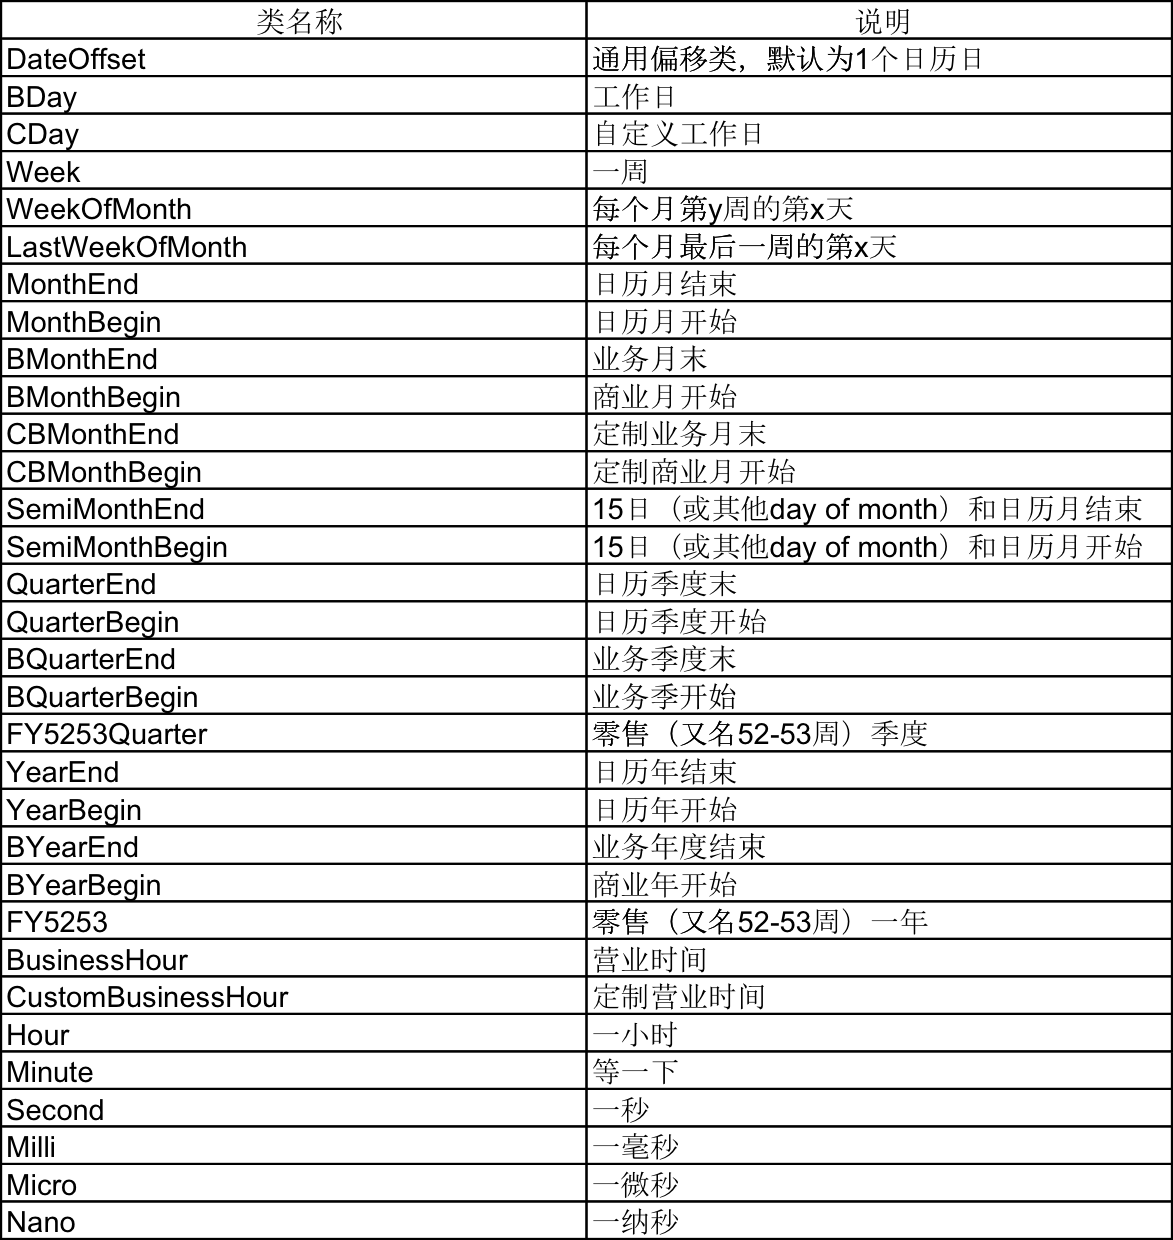

In [91]:
import pandas.tseries.offsets
d = pd.Timestamp(2018,10,1,10,1,1)
d

Timestamp('2018-10-01 10:01:01')

使用 DateOffset() 实现时间戳位移。


In [93]:
#向后移动一个月零两天。

from pandas.tseries.offsets import DateOffset

d + DateOffset(months=1, days=2)

Timestamp('2018-11-03 10:01:01')

In [95]:
#也可以用时间戳加减常用时间类以实现时间戳位移。向前移动 10 个工作日。

from pandas.tseries.offsets import BDay

d - 10 * BDay()

Timestamp('2018-09-17 10:01:01')

In [97]:
#向后移动一个月末。

from pandas.tseries.offsets import BMonthEnd

d + BMonthEnd()

Timestamp('2018-10-31 10:01:01')

In [99]:
#个性化定制日期。虽然日历规定年末是 12 月，加入参数后相当于人为规定 2 月是年末。

#向后移动到上两个年末。

from pandas.tseries.offsets import YearEnd

d + YearEnd(month=2)

Timestamp('2019-02-28 10:01:01')

In [101]:
#向前移动到上一个周四。

from pandas.tseries.offsets import Week

d - Week(weekday=4)

Timestamp('2018-09-28 10:01:01')

可以使用 rollforward() 将指定时间向前或向后移动到一个制定常用时间类的时间戳上。

In [103]:
#将时间移动到下一个月末：

offset = BMonthEnd()
offset.rollforward(d)

Timestamp('2018-10-31 10:01:01')

In [105]:
#将时间移动到上一个月末。

offset.rollback(d)

Timestamp('2018-09-28 10:01:01')

In [107]:
#偏移也同样适用于时间索引

rng

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10'],
              dtype='datetime64[ns]', freq='D')

In [109]:
#所有的时间索引向后移动两日。

rng + DateOffset(days=2)

DatetimeIndex(['2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06',
               '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12'],
              dtype='datetime64[ns]', freq='D')

In [111]:
#所有的时间索引向后移动两个工作日。

rng + 2*BDay()

DatetimeIndex(['2018-10-03', '2018-10-04', '2018-10-05', '2018-10-08',
               '2018-10-09', '2018-10-09', '2018-10-09', '2018-10-10',
               '2018-10-11', '2018-10-12'],
              dtype='datetime64[ns]', freq=None)

In [113]:
#所有的时间索引向后移动 15 分钟。

from pandas.tseries.offsets import Minute

rng + Minute(15)

DatetimeIndex(['2018-10-01 00:15:00', '2018-10-02 00:15:00',
               '2018-10-03 00:15:00', '2018-10-04 00:15:00',
               '2018-10-05 00:15:00', '2018-10-06 00:15:00',
               '2018-10-07 00:15:00', '2018-10-08 00:15:00',
               '2018-10-09 00:15:00', '2018-10-10 00:15:00'],
              dtype='datetime64[ns]', freq='D')


参数名	| 说明
--|--
B	| 工作日频率
C	| 定制工作日频率
D	|日历日频率
W	|每周频率
M	|月结束频率
SM	|半月结束频率(15 个月和月末)
BM	|业务月末频率
CBM	|定制业务月末频率
MS	|月起始频率
sMs	|半月起始频率(第 1 和 15)
BMS	|业务月开始频率
CBMS	|定制商业月份开始频率
Q	|四分频结束频率
BQ	|业务四分之一频率
QS	|四分频启动频率
BQS	|业务季开始频率
A	|年结束频率
BA	|业务年结束频率
AS	|年起始频率
BAS	|业务年开始频率
BH	|工作时间频率
H	|每小时频率
T, min	|分钟频率
S	|次频
L, ms	|毫秒
U, uS	|微秒
N	|纳秒

In [115]:
#创建 10 条以 2018 年 10 月 1 日为开始，间隔为 1 天 1 小时 1 分钟 10 微秒的时间索引。

pd.date_range("2018-10-1", periods=10, freq='1D1H1min10U')

DatetimeIndex([       '2018-10-01 00:00:00', '2018-10-02 01:01:00.000010',
               '2018-10-03 02:02:00.000020', '2018-10-04 03:03:00.000030',
               '2018-10-05 04:04:00.000040', '2018-10-06 05:05:00.000050',
               '2018-10-07 06:06:00.000060', '2018-10-08 07:07:00.000070',
               '2018-10-09 08:08:00.000080', '2018-10-10 09:09:00.000090'],
              dtype='datetime64[ns]', freq='90060000010U')

In [117]:
#创建 10 条以 2018 年 10 月 1 日为开始，间隔为每周三的时间索引。

pd.date_range("2018-10-1", periods=10, freq='W-WED')

DatetimeIndex(['2018-10-03', '2018-10-10', '2018-10-17', '2018-10-24',
               '2018-10-31', '2018-11-07', '2018-11-14', '2018-11-21',
               '2018-11-28', '2018-12-05'],
              dtype='datetime64[ns]', freq='W-WED')

在使用特定频率（MonthEnd，MonthBegin，WeekEnd 等）的参数时，如果起始时间是刚好在频率点上，使用 n 参数可以决定是否让该点参与计算。

In [119]:
#n=1 时参与计算。

from pandas.tseries.offsets import MonthBegin

pd.Timestamp('2018-10-1') + MonthBegin(n=1)

Timestamp('2018-11-01 00:00:00')

In [122]:
#n=0 时不参与计算。

pd.Timestamp('2018-10-1') + MonthBegin(n=0)
 


Timestamp('2018-10-01 00:00:00')

### 下采样聚合 
下采样中的聚合是指下采样后，对未被采样到的点进行的一系列计算。

In [124]:
#创建 100 个日历日为时间索引的 DataFrame，将其以月频率下采样。

df = pd.DataFrame(np.random.rand(100, 3),
                  index=pd.date_range('10/1/2018', freq='D', periods=100),
                  columns=['A', 'B', 'C'])
r = df.resample('M')
r

In [126]:
#对未采样点求和，结果保存在采样点的值中。

r.sum()

,A,B,C
2018-10-31,13.865280,16.318278,13.083000
2018-11-30,12.791562,11.647247,15.406612
2018-12-31,14.148978,15.278252,17.626128
2019-01-31,3.801208,3.060139,4.708172


In [128]:
#在下采样后也能进行查找操作。选择 A、C 列后取均值计算。

r[['A', 'C']].mean()

,A,C
2018-10-31,0.447267,0.422032
2018-11-30,0.426385,0.513554
2018-12-31,0.456419,0.568585
2019-01-31,0.475151,0.588521


In [130]:
#使用 agg() 同时进行不同的计算。对采样结果进行取和与取均值计算。

r.agg([np.sum, np.mean])

A                    B                    C          
                  sum      mean        sum      mean        sum      mean
2018-10-31  13.865280  0.447267  16.318278  0.526396  13.083000  0.422032
2018-11-30  12.791562  0.426385  11.647247  0.388242  15.406612  0.513554
2018-12-31  14.148978  0.456419  15.278252  0.492847  17.626128  0.568585
2019-01-31   3.801208  0.475151   3.060139  0.382517   4.708172  0.588521

In [132]:
#选择 A 列，同时进行取和，取均值，取标准差计算。

r['A'].agg([np.sum, np.mean, np.std])

,sum,mean,std
2018-10-31,13.865280,0.447267,0.289638
2018-11-30,12.791562,0.426385,0.291095
2018-12-31,14.148978,0.456419,0.340553
2019-01-31,3.801208,0.475151,0.235773


In [133]:
#对 A 列求和与标准差，对 B 列求均值与标准差。

r.agg({'A': ['sum', 'std'], 'B': ['mean', 'std']})

A                   B          
                  sum       std      mean       std
2018-10-31  13.865280  0.289638  0.526396  0.326797
2018-11-30  12.791562  0.291095  0.388242  0.280260
2018-12-31  14.148978  0.340553  0.492847  0.286452
2019-01-31   3.801208  0.235773  0.382517  0.294559